In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:\StudyMaterial\GeoIq\data.csv')
df.columns = ['Year', 'Category', 'Range', 'Value']
df.head()

,Year,Category,Range,Value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [3]:
#Data Preprocessing
df['Value']=df['Value'].replace({"na":0})
df['Value']=df['Value'].astype(str).astype(int)

# 1. Identify the largest Ethnic group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.

In [4]:
df1=df.groupby(['Year','Category'])['Value'].sum().unstack().apply(lambda x : x.reset_index(drop = True))

In [5]:
df_part1 = df1.rename_axis('Year').reset_index()

In [6]:
x=1957
for i in range(62):
    df_part1.Year[i] =x
    x=x+1
df_part1

C:\Users\Pranav\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Category,Year,Other Ethnic Groups (Females),Other Ethnic Groups (Males),Other Ethnic Groups (Total),Total Chinese,Total Female Chinese,Total Female Indians,Total Female Malays,Total Female Residents,Total Indians,Total Malays,Total Male Chinese,Total Male Indians,Total Male Malays,Total Male Residents,Total Residents
0,1957,17370,18606,35976,1137408,565609,38607,97024,718610,125912,202907,571799,87305,105883,783593,1502203
1,1958,15200,14800,30000,1178100,582700,42400,101400,741700,132400,212000,595400,90000,110600,810800,1552500
2,1959,15500,15300,30800,1235500,611300,44000,107000,777800,133000,223600,624200,89000,116600,845100,1622900
3,1960,15300,15000,30300,1284000,635900,45500,112800,809500,134400,235200,648100,88900,122400,874400,1683900
4,1961,15400,14900,30300,1328500,658400,47200,118300,839300,136900,245500,670100,89700,127200,901900,1741200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2014,73247,66435,139682,3675734,1932953,200246,306569,2513015,408346,599863,1742781,208100,293294,2310610,4823625
58,2015,73642,66540,140182,3746225,1970892,203199,311072,2558805,413513,607882,1775333,210314,296810,2348997,4907802
59,2016,74783,66755,141538,3817895,2009848,206395,315669,2606695,418233,616566,1808047,211838,300897,2387537,4994232
60,2017,75752,66997,142749,3897313,2052643,209628,320963,2658986,423433,626221,1844670,213805,305258,2430730,5089716


In [7]:
maxValues=df_part1.max()
maxValues=maxValues.to_frame().reset_index()
maxValues.columns=['Category','Total']
maxValues

,Category,Total
0,Year,2018
1,Other Ethnic Groups (Females),76846
2,Other Ethnic Groups (Males),67424
3,Other Ethnic Groups (Total),144270
4,Total Chinese,3975586
5,Total Female Chinese,2094352
6,Total Female Indians,212563
7,Total Female Malays,326562
8,Total Female Residents,2710323
9,Total Indians,428314


Text(0.5, 1.0, 'SUM of various Categories')

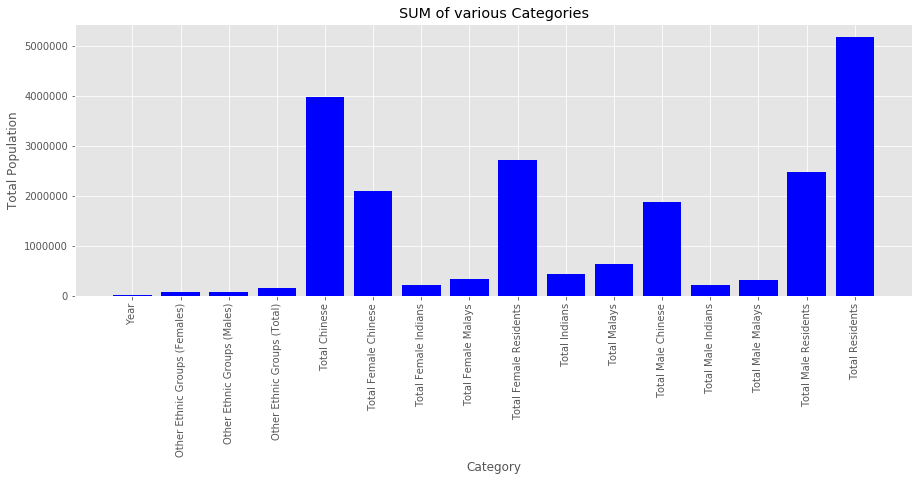

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.bar(maxValues.Category, maxValues.Total, color='blue')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Total Population")
plt.title("SUM of various Categories")

### Ethnic Group with Largest Population

In [9]:
X=df_part1[['Total Indians', 'Total Malays', 'Total Chinese', 'Other Ethnic Groups (Total)']]
larg=X.max()
larg=larg.to_frame().reset_index()
larg.columns=['Category','Total']
larg = larg.sort_values(['Total'], ascending=False)
larg

,Category,Total
2,Total Chinese,3975586
1,Total Malays,636807
0,Total Indians,428314
3,Other Ethnic Groups (Total),144270


Text(0.5, 1.0, 'Ethnic Group with Largest Population')

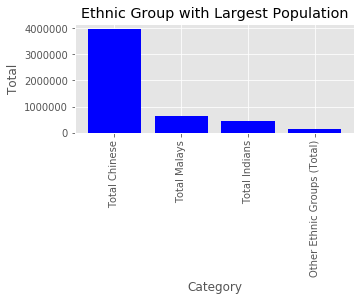

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(5,2))
plt.bar(larg.Category, larg.Total, color='blue')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Total")
plt.title("Ethnic Group with Largest Population")

Text(0.5, 1.0, 'Largest Ethnic Group')

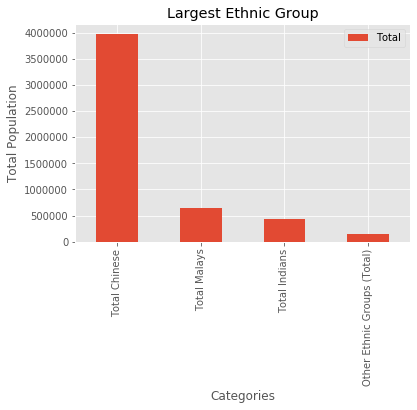

In [11]:
larg.plot(x ='Category', y='Total', kind = 'bar')
plt.xlabel('Categories')
plt.ylabel('Total Population')
plt.title('Largest Ethnic Group')

### Average Population growth of the largest Ethnic Group over the years

In [12]:
Y=df_part1[['Total Chinese']]
Y=Y.pct_change()
Y1=df_part1[['Year']]
result = pd.concat([Y1,Y], axis=1)
result=result.rename(columns={'Total Chinese':'Average Chinese Growth %'})
result

Category,Year,Average Chinese Growth %
0,1957,NaN
1,1958,0.035776
2,1959,0.048723
3,1960,0.039255
4,1961,0.034657
...,...,...
57,2014,0.018788
58,2015,0.019177
59,2016,0.019131
60,2017,0.020802


Text(0.5, 1.0, 'Average Population growth')

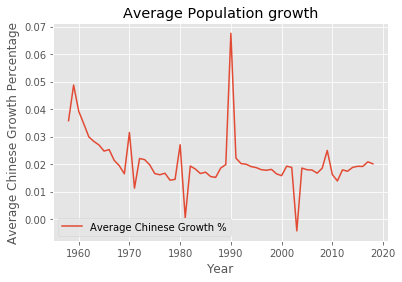

In [13]:
result.plot(x ='Year', y='Average Chinese Growth %', kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average Chinese Growth Percentage')
plt.title('Average Population growth')

### Proportion of the total population do they constitute

In [14]:
Z=df_part1[['Total Residents', 'Total Chinese']]
Z['Proportion']=(Z['Total Residents']/Z['Total Chinese'])
Z1=df_part1[['Year']]
result_prop = pd.concat([Z1,Z], axis=1)
result_prop

C:\Users\Pranav\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Category,Year,Total Residents,Total Chinese,Proportion
0,1957,1502203,1137408,1.320725
1,1958,1552500,1178100,1.317800
2,1959,1622900,1235500,1.313557
3,1960,1683900,1284000,1.311449
4,1961,1741200,1328500,1.310651
...,...,...,...,...
57,2014,4823625,3675734,1.312289
58,2015,4907802,3746225,1.310066
59,2016,4994232,3817895,1.308111
60,2017,5089716,3897313,1.305955


Text(0.5, 1.0, 'Proportion of the total population Chinese constitute')

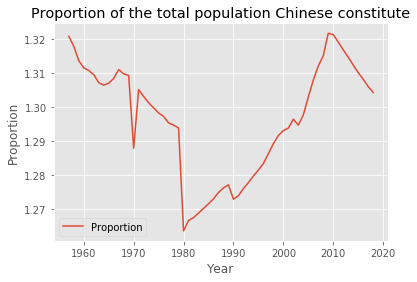

In [15]:
result_prop.plot(x ='Year', y='Proportion', kind = 'line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of the total population Chinese constitute')

# 2. Identify the largest age group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.

In [16]:
df2=df.groupby(['Year','Range'])['Value'].sum().unstack().apply(lambda x : x.reset_index(drop = True))
df2

Range,0 - 4 Years,10 - 14 Years,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,5 - 9 Years,...,60 - 64 Years,65 - 69 Years,65 Years & Over,70 - 74 Years,70 Years & Over,75 - 79 Years,75 Years & Over,80 - 84 Years,80 Years & Over,85 Years & Over
0,1058908,545120,542716,477064,446904,359700,330836,304868,266864,872388,...,97104,61596,124244,35096,62648,16900,27552,7144,10652,3508
1,1111200,628400,537200,499600,458800,380400,337200,310000,277200,918400,...,103600,68400,134800,0,66400,0,0,0,0,0
2,1155200,702800,526000,532400,460400,408400,340800,316400,289600,964000,...,109200,71200,142800,0,71600,0,0,0,0,0
3,1188000,801200,498800,558000,464800,426400,345600,322000,297600,1001200,...,114800,73600,150000,0,76400,0,0,0,0,0
4,1214800,869600,499600,570000,478400,449200,344800,332400,297200,1035600,...,128800,76000,155200,0,79200,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,725476,883184,989348,1055672,1062636,1169148,1208116,1264092,1234132,823160,...,926008,644792,1726404,427260,1081612,305176,654352,193672,349176,155504
58,734300,857552,971608,1056508,1084120,1162476,1204268,1267020,1213652,817808,...,961972,729700,1838860,410524,1109160,324844,698636,207140,373792,166652
59,748640,829980,959084,1043416,1119952,1142176,1207992,1253780,1204732,806036,...,1007412,792080,1950280,415184,1158200,351820,743016,214224,391196,176972
60,750612,825012,931892,1036288,1160792,1117360,1203824,1245936,1213828,802300,...,1050604,815876,2066768,477976,1250892,367812,772916,217364,405104,187740


In [17]:
df_part2 = df2.rename_axis('Year').reset_index()

In [18]:
x=1957
for i in range(62):
    df_part2.Year[i] =x
    x=x+1
df_part2

C:\Users\Pranav\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Range,Year,0 - 4 Years,10 - 14 Years,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,...,60 - 64 Years,65 - 69 Years,65 Years & Over,70 - 74 Years,70 Years & Over,75 - 79 Years,75 Years & Over,80 - 84 Years,80 Years & Over,85 Years & Over
0,1957,1058908,545120,542716,477064,446904,359700,330836,304868,266864,...,97104,61596,124244,35096,62648,16900,27552,7144,10652,3508
1,1958,1111200,628400,537200,499600,458800,380400,337200,310000,277200,...,103600,68400,134800,0,66400,0,0,0,0,0
2,1959,1155200,702800,526000,532400,460400,408400,340800,316400,289600,...,109200,71200,142800,0,71600,0,0,0,0,0
3,1960,1188000,801200,498800,558000,464800,426400,345600,322000,297600,...,114800,73600,150000,0,76400,0,0,0,0,0
4,1961,1214800,869600,499600,570000,478400,449200,344800,332400,297200,...,128800,76000,155200,0,79200,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2014,725476,883184,989348,1055672,1062636,1169148,1208116,1264092,1234132,...,926008,644792,1726404,427260,1081612,305176,654352,193672,349176,155504
58,2015,734300,857552,971608,1056508,1084120,1162476,1204268,1267020,1213652,...,961972,729700,1838860,410524,1109160,324844,698636,207140,373792,166652
59,2016,748640,829980,959084,1043416,1119952,1142176,1207992,1253780,1204732,...,1007412,792080,1950280,415184,1158200,351820,743016,214224,391196,176972
60,2017,750612,825012,931892,1036288,1160792,1117360,1203824,1245936,1213828,...,1050604,815876,2066768,477976,1250892,367812,772916,217364,405104,187740


In [19]:
maxValues2=df_part2.max()
maxValues2=maxValues2.to_frame().reset_index()
maxValues2.columns=['Range','Total']
maxValues2

,Range,Total
0,Year,2018
1,0 - 4 Years,1224400
2,10 - 14 Years,1170400
3,15 - 19 Years,1187600
4,20 - 24 Years,1156000
5,25 - 29 Years,1166524
6,30 - 34 Years,1237334
7,35 - 39 Years,1291512
8,40 - 44 Years,1292068
9,45 - 49 Years,1295964


Text(0.5, 1.0, 'Age-Group')

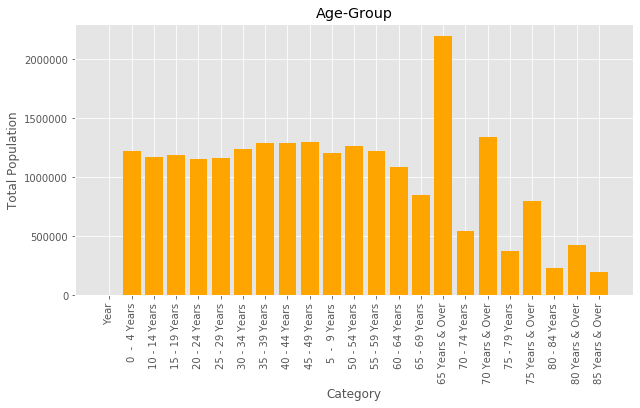

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.bar(maxValues2.Range, maxValues2.Total, color='orange')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Total Population")
plt.title("Age-Group")

### Age Group with largest Population

In [21]:
maxValuesnew = maxValues2.sort_values(['Total'], ascending=False)
maxValuesnew

,Range,Total
15,65 Years & Over,2191416
17,70 Years & Over,1343012
9,45 - 49 Years,1295964
8,40 - 44 Years,1292068
7,35 - 39 Years,1291512
11,50 - 54 Years,1262392
6,30 - 34 Years,1237334
1,0 - 4 Years,1224400
12,55 - 59 Years,1217560
10,5 - 9 Years,1201200


Text(0.5, 1.0, 'Age-Group vs Population')

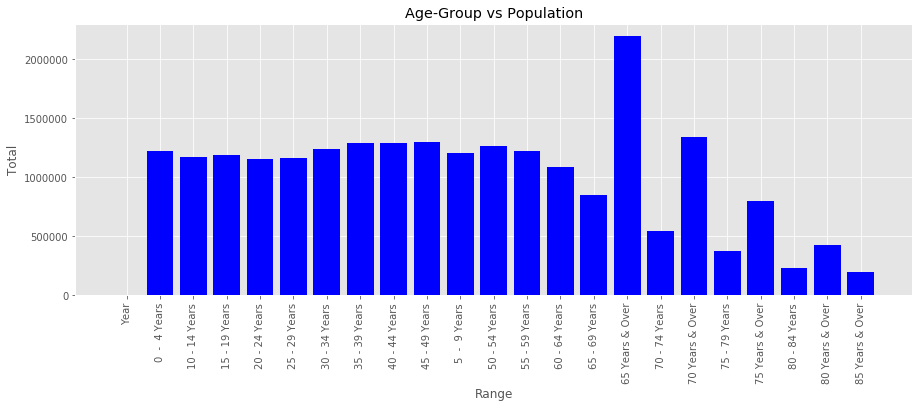

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.bar(maxValues2.Range, maxValues2.Total, color='blue')
plt.xticks(rotation=90)
plt.xlabel("Range")
plt.ylabel("Total")
plt.title("Age-Group vs Population")

### Average Population growth over the years

In [23]:
Y=df_part2[['65 Years & Over']]
Y=Y.pct_change()
Y1=df_part2[['Year']]
result = pd.concat([Y1,Y], axis=1)
result=result.rename(columns={'65 Years & Over':'Average Polpulation Growth %'})
result

Range,Year,Average Polpulation Growth %
0,1957,NaN
1,1958,0.084962
2,1959,0.059347
3,1960,0.050420
4,1961,0.034667
...,...,...
57,2014,0.067165
58,2015,0.065139
59,2016,0.060592
60,2017,0.059729


Text(0.5, 1.0, 'Average Population growth')

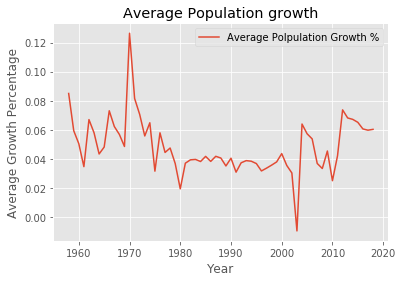

In [24]:
result.plot(x ='Year', y='Average Polpulation Growth %', kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average Growth Percentage')
plt.title('Average Population growth')

### Proportion of the total population do they constitute

In [25]:
Z1=df_part2[['Year','65 Years & Over']]
Z2=df_part1[['Total Residents']]
Z = pd.concat([Z1,Z2], axis=1)
Z['Proportion']=(Z['Total Residents']/Z['65 Years & Over'])
Z

,Year,65 Years & Over,Total Residents,Proportion
0,1957,124244,1502203,12.090749
1,1958,134800,1552500,11.517062
2,1959,142800,1622900,11.364846
3,1960,150000,1683900,11.226000
4,1961,155200,1741200,11.219072
...,...,...,...,...
57,2014,1726404,4823625,2.794030
58,2015,1838860,4907802,2.668937
59,2016,1950280,4994232,2.560777
60,2017,2066768,5089716,2.462645


Text(0.5, 1.0, 'Proportion of the total population 65-years and above constitute')

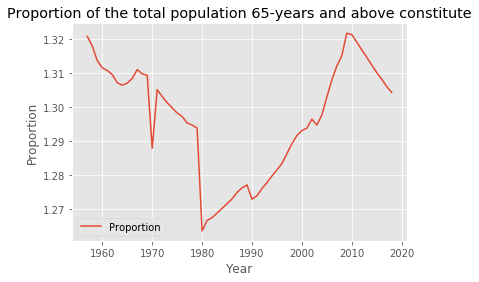

In [26]:
result_prop.plot(x ='Year', y='Proportion', kind = 'line')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of the total population 65-years and above constitute')

# 3. Identify the group (by age, ethnicity and gender) that:
   ##   a. Has shown the highest growth rate
   ##  b. Has shown the lowest growth rate
   ##  c. Has remained the same

# ->By Age

In [27]:
df_part3=df2.iloc[[0,61]]
df_part3

Range,0 - 4 Years,10 - 14 Years,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,5 - 9 Years,...,60 - 64 Years,65 - 69 Years,65 Years & Over,70 - 74 Years,70 Years & Over,75 - 79 Years,75 Years & Over,80 - 84 Years,80 Years & Over,85 Years & Over
0,1058908,545120,542716,477064,446904,359700,330836,304868,266864,872388,...,97104,61596,124244,35096,62648,16900,27552,7144,10652,3508
61,742112,826120,906080,1022064,1166524,1125588,1214880,1214560,1231352,796264,...,1086752,848404,2191416,542184,1343012,373308,800828,228412,427520,199108


In [28]:
df_part3change=df_part3.pct_change()
df_part3change=df_part3change.dropna()
df_part3change=df_part3change.transpose()
df_part3change

,61
Range,
0 - 4 Years,-0.299172
10 - 14 Years,0.515483
15 - 19 Years,0.669529
20 - 24 Years,1.142404
25 - 29 Years,1.610234
30 - 34 Years,2.129241
35 - 39 Years,2.672152
40 - 44 Years,2.983888
45 - 49 Years,3.614156


 ##   a. Has shown the highest growth rate

In [29]:
df_part3change.loc[df_part3change.idxmax()]

,61
Range,
85 Years & Over,55.758267


 ##   b. Has shown the lowest growth rate

In [30]:
df_part3change.loc[df_part3change.idxmin()]

,61
Range,
0 - 4 Years,-0.299172


## c. Has remained the same

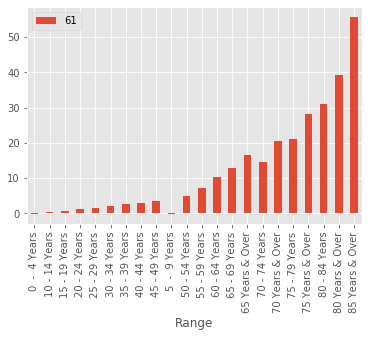

In [31]:
df_part3change.plot(kind='bar')

From the above plot it's clear that the growth has remained same for the age group of ***70 Years and Over*** and **75-79 Years**

# -> By Ethnicity

In [32]:
df_part4=X.iloc[[0,61]]
df_part4

Category,Total Indians,Total Malays,Total Chinese,Other Ethnic Groups (Total)
0,125912,202907,1137408,35976
61,428314,636807,3975586,144270


In [33]:
df_part4change=df_part4.pct_change()
df_part4change=df_part4change.dropna()
df_part4change=df_part4change.transpose()
df_part4change

,61
Category,
Total Indians,2.401693
Total Malays,2.138418
Total Chinese,2.495303
Other Ethnic Groups (Total),3.010173


 ##   a. Has shown the highest growth rate

In [34]:
df_part4change.loc[df_part4change.idxmax()]

,61
Category,
Other Ethnic Groups (Total),3.010173


 ##   b. Has shown the lowest growth rate

In [35]:
df_part4change.loc[df_part4change.idxmin()]

,61
Category,
Total Malays,2.138418


## c. Has remained the same

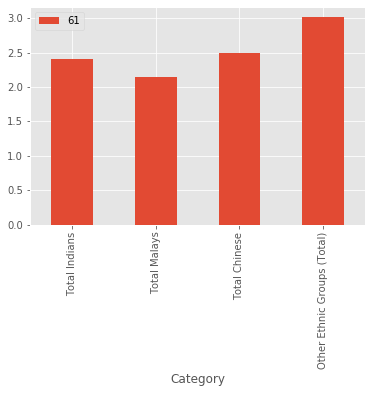

In [36]:
df_part4change.plot(kind='bar')

From the above plot it's clear that the growth has almost remained same for ***Total Indian*** and ***Total Chinese***

# -> By Gender

In [37]:
G=df_part1[['Other Ethnic Groups (Females)','Other Ethnic Groups (Males)','Total Female Chinese','Total Male Chinese','Total Male Indians','Total Female Indians','Total Female Malays','Total Male Malays','Total Female Residents','Total Male Residents']]
df_part5=G.iloc[[0,61]]
df_part5

Category,Other Ethnic Groups (Females),Other Ethnic Groups (Males),Total Female Chinese,Total Male Chinese,Total Male Indians,Total Female Indians,Total Female Malays,Total Male Malays,Total Female Residents,Total Male Residents
0,17370,18606,565609,571799,87305,38607,97024,105883,718610,783593
61,76846,67424,2094352,1881234,215751,212563,326562,310245,2710323,2474654


In [38]:
df_part5change=df_part5.pct_change()
df_part5change=df_part5change.dropna()
df_part5change=df_part5change.transpose()
df_part5change

,61
Category,
Other Ethnic Groups (Females),3.424064
Other Ethnic Groups (Males),2.623777
Total Female Chinese,2.702827
Total Male Chinese,2.290027
Total Male Indians,1.471233
Total Female Indians,4.505815
Total Female Malays,2.365786
Total Male Malays,1.930074
Total Female Residents,2.771619


 ##   a. Has shown the highest growth rate

In [39]:
df_part5change.loc[df_part5change.idxmax()]

,61
Category,
Total Female Indians,4.505815


 ##   b. Has shown the lowest growth rate

In [40]:
df_part5change.loc[df_part5change.idxmin()]

,61
Category,
Total Male Indians,1.471233


## c. Has remained the same

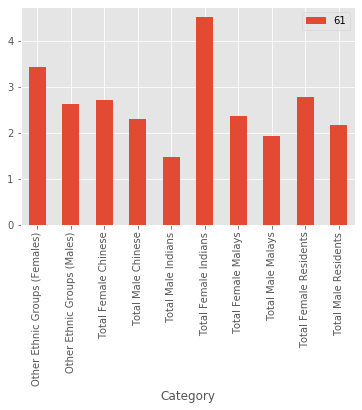

In [41]:
df_part5change.plot(kind='bar')

From the above plot it's clear that the growth has remained same for ***Total Female Chinese*** and ***Other Ethnic Groups (Males)***

# 4. Graph for population trends

Text(0.5, 1.0, 'Total Resident Population vs Year')

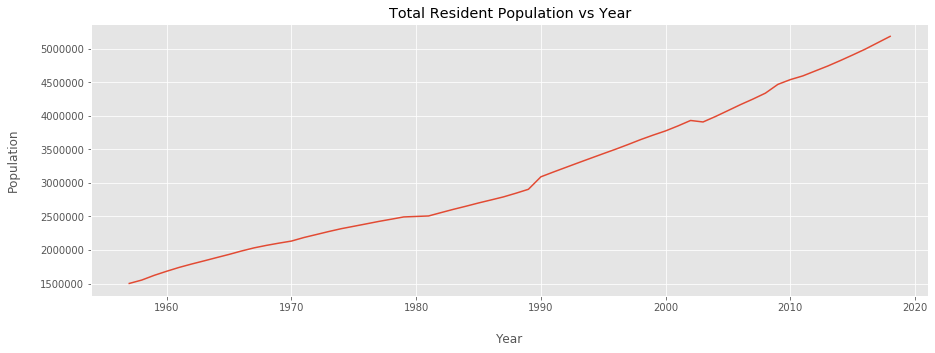

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.plot(df_part2[['Year']],df_part1[['Total Residents']])
plt.xlabel("Year", labelpad=20)
plt.ylabel("Population", labelpad=20)
plt.title("Total Resident Population vs Year")

## Population vs Category with respect to Age-Group

In [43]:
li=list(df1.columns.values) 
cate=pd.DataFrame(li,columns = ['Category'])
li2=list(df2.columns.values)
cate2=pd.DataFrame(li2,columns = ['Age Group'])

In [44]:
df5=df.groupby(['Category','Range'])['Value'].sum().unstack().apply(lambda x : x.reset_index(drop = True))
df_part5=pd.concat([cate,df5], axis=1)
df_part5

,Category,0 - 4 Years,10 - 14 Years,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,...,60 - 64 Years,65 - 69 Years,65 Years & Over,70 - 74 Years,70 Years & Over,75 - 79 Years,75 Years & Over,80 - 84 Years,80 Years & Over,85 Years & Over
0,Other Ethnic Groups (Females),148497,131166,110958,104571,138671,184450,189019,160087,122520,...,41939,30172,85759,17632,55587,11361,28655,7411,14211,6680
1,Other Ethnic Groups (Males),151659,128459,102786,86508,98281,136412,162708,156955,130926,...,50110,33272,78713,17836,45441,10070,21605,5653,9453,3745
2,Other Ethnic Groups (Total),300155,259623,213744,191081,236953,320861,351725,317041,253446,...,92047,63441,164465,35467,101024,21430,50257,13063,23662,10424
3,Total Chinese,10130813,10679548,10566669,10455158,10737008,10591087,10063678,9296283,8360602,...,4849065,3621094,9517251,2186926,5896157,1307357,3078031,793000,1422716,623817
4,Total Female Chinese,4899716,5162409,5123966,5144560,5392790,5365575,5087875,4678820,4185554,...,2492196,1921671,5427259,1206455,3505588,758598,1899833,491974,925448,429147
5,Total Female Indians,563446,545109,492162,478628,529181,551629,505598,429404,358029,...,164267,114345,272730,70269,158385,42255,81816,22707,35851,13103
6,Total Female Malays,1229078,1181216,1113876,1054575,988657,907049,819018,736796,651203,...,317855,222787,547853,135628,325066,79862,161738,44076,69296,24891
7,Total Female Residents,6840731,7019898,6840960,6782335,7049302,7008700,6601508,6005104,5317301,...,3016251,2288970,6333585,1429985,4044615,892074,2172030,566165,1044799,473817
8,Total Indians,1137071,1105560,1012816,977474,1070877,1190490,1177900,1055020,900506,...,419130,292939,691505,176092,398566,99243,198774,52388,86986,34474
9,Total Malays,2515684,2415010,2282029,2145968,1992016,1819676,1640502,1481700,1314159,...,636829,440648,1063484,262230,622836,150227,305506,81806,128705,46337


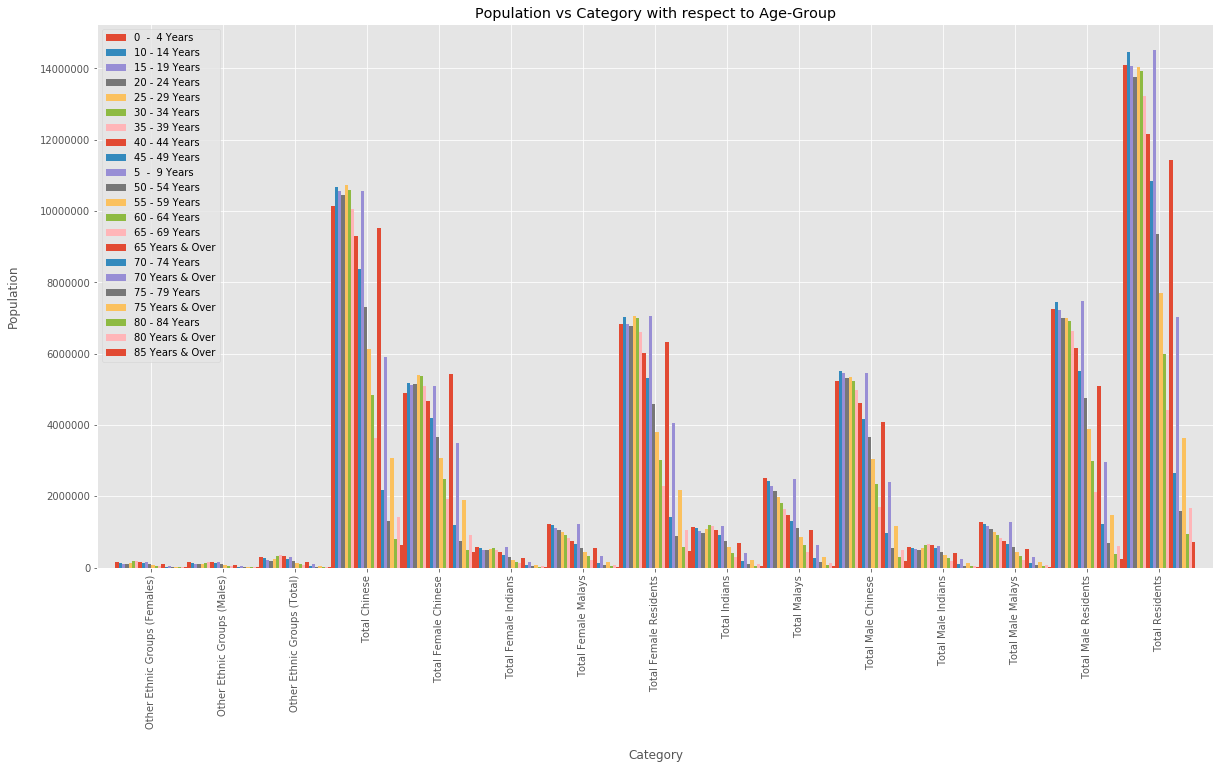

In [45]:
df_part5.plot(kind='bar',width=1, figsize=(20, 10),x='Category')
plt.xlabel("Category", labelpad=20)
plt.ylabel("Population", labelpad=20)
plt.title("Population vs Category with respect to Age-Group")
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

## Population vs Gender

In [46]:
dfgender=G[['Total Male Residents','Total Female Residents']]
dfgender=pd.concat([df_part2.Year,dfgender], axis=1)
dfgender

,Year,Total Male Residents,Total Female Residents
0,1957,783593,718610
1,1958,810800,741700
2,1959,845100,777800
3,1960,874400,809500
4,1961,901900,839300
...,...,...,...
57,2014,2310610,2513015
58,2015,2348997,2558805
59,2016,2387537,2606695
60,2017,2430730,2658986


Text(0.5, 1.0, 'Population vs Gender')

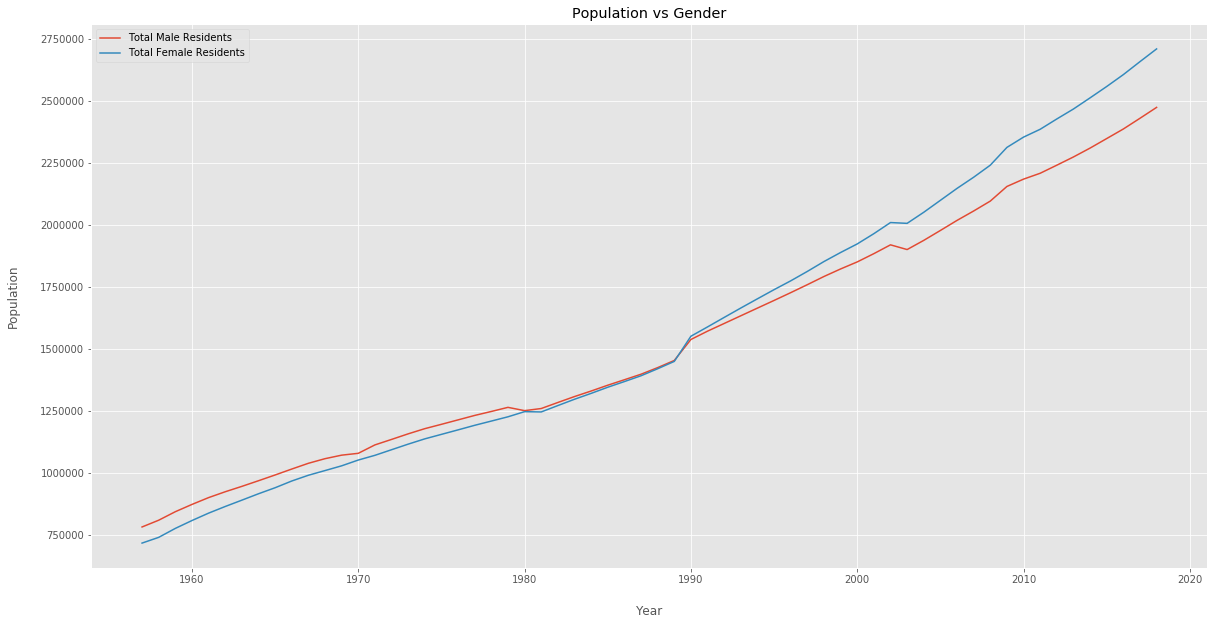

In [47]:
dfgender.plot(kind='line', figsize=(20, 10),x='Year')
plt.xlabel("Year", labelpad=20)
plt.ylabel("Population", labelpad=20)
plt.title("Population vs Gender")

# Predicting Population on the basis of Ethnicity

In [48]:
dfmodel=pd.concat([df_part2.Year,X,df_part1['Total Residents']], axis=1)
dfmodel

,Year,Total Indians,Total Malays,Total Chinese,Other Ethnic Groups (Total),Total Residents
0,1957,125912,202907,1137408,35976,1502203
1,1958,132400,212000,1178100,30000,1552500
2,1959,133000,223600,1235500,30800,1622900
3,1960,134400,235200,1284000,30300,1683900
4,1961,136900,245500,1328500,30300,1741200
...,...,...,...,...,...,...
57,2014,408346,599863,3675734,139682,4823625
58,2015,413513,607882,3746225,140182,4907802
59,2016,418233,616566,3817895,141538,4994232
60,2017,423433,626221,3897313,142749,5089716


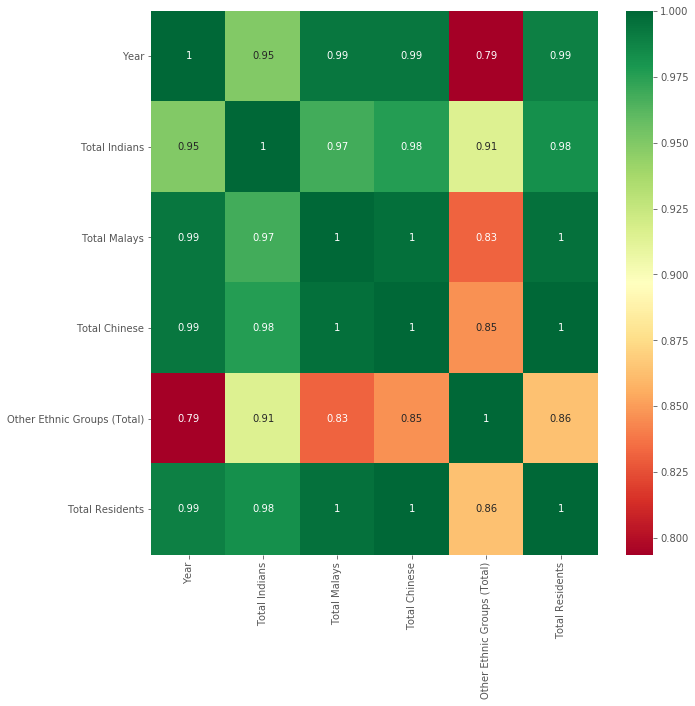

In [49]:
corrmat = dfmodel.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dfmodel[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
X = dfmodel.iloc[:, :-1].values
y = dfmodel.iloc[:, -1].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2792149.34 2792150.  ]
 [2905433.51 2905434.  ]
 [3091544.14 3091550.  ]
 [4078629.76 4078631.  ]
 [4338650.1  4338649.  ]
 [3231780.5  3231786.  ]
 [2069700.96 2069700.  ]
 [3931162.33 3931165.  ]
 [1622899.94 1622900.  ]
 [3776088.86 3776092.  ]
 [2607420.83 2607417.  ]
 [1741200.03 1741200.  ]
 [2032201.07 2032200.  ]]


In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.0471431533447824
MSE: 7.83080702212143
RMSE: 2.7983579152998694
